In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
print(tf.__version__)

2.0.0


## Definitions:

- **epoch:** It is the entire processing by the learning algorithm of the entire train-set. The number of epochs is how many times the algorithm is going to run and see the full train-set. The number of epochs affects directly (or not) the result of the training step (with just a few epochs you can reach only a local minimum, but with more epochs, you can reach a global minimum or at least a better local minimum).
- **tensor:** According to the tensorflow website, a tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Each tensor has a data type and a shape. There are the main object we will manipulate with TensorFlow, that will be passes through our programms. A tensor will be defined by the followings:
    - Rank: That's the dimension of the tensor (0 for scaler, 1 for vector, 2 for matrices etc...)
    - Shape: The number of elements in each dimension and the number of dimensions.
- **graph:** This is the first step when creating a model using tensorflow. A graph represents the data flow computations (the nodes and operations and how they are connected to each other).
- **session:** This is the second step in creating a model. A session is the object that evaluate, run the graph on some data. When one need to evaluate a tensor, one must create a "session" since tensors represents a partially complete computation.

## Exemple
### Building tensors

In [9]:
# These are 0-Dimensional tensors, hence scalers
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(42, tf.int16)
float_number = tf.Variable(3.14, tf.float32)

# This is 1-Dimensional tensor, hence, a vector
string_1D = tf.Variable(['This is a string','This is another string'], tf.string)

# This is a 2-Dimensional tensor, hence, a matrice (2*2)
string_2D = tf.Variable([['string11','string12'],['string21','string22']])

# Etc...
# We also refer to 1D tensors as "rank1_tensors" and 2D tensors as "rank2_tensors"

In [10]:
string

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>

In [12]:
string_1D

<tf.Variable 'Variable:0' shape=(2,) dtype=string, numpy=array([b'This is a string', b'This is another string'], dtype=object)>

In [16]:
tf.rank(string_2D)

<tf.Tensor: id=88, shape=(), dtype=int32, numpy=2>

The "numpy=2" means that this is a rank2 tensor, hence, a matrix. We still can access the shape of a tensor using the .shape

In [17]:
string_2D.shape

TensorShape([2, 2])

## Reshaping tensors

In [39]:
tensor1 = tf.ones([12]) #This is a vector full of one
print(tensor1)
print("the rank is " + str(tf.rank(tensor1)))

tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(12,), dtype=float32)
the rank is tf.Tensor(1, shape=(), dtype=int32)


In [41]:
tensor2 = tf.ones([6,2]) #This is a matrix full on one, with 5 rows and 2 columns
print(tensor2)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(6, 2), dtype=float32)


In [31]:
tensor3 = tf.ones([3,2,2]) # This is a matrix with 3 rows, 2 columns and 2 layers in width
print(tensor3)

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(3, 2, 2), dtype=float32)


In [35]:
tensor4 = tf.reshape(tensor3, [6,2]) #Or with [6,-1] it works as well
print(tensor4) 

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(6, 2), dtype=float32)


In [42]:
tensor5 = tf.reshape(tensor2, [12])
print(tensor5)

tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(12,), dtype=float32)


# Linear Regression
## Simple linear regression
from "ML Glossary"

In [3]:
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\Advertising.txt"
data = pd.read_csv(path, sep=",")
data = data.drop(['Index','TV','newspaper'], axis = 1)
print(data.head())

   radio  sales
0   37.8   22.1
1   39.3   10.4
2   45.9    9.3
3   41.3   18.5
4   10.8   12.9


We want to build a model to estimate the sales given the amount of money spent on advertisment (here on Radio)

## Making prediction

Text(0, 0.5, 'Sales')

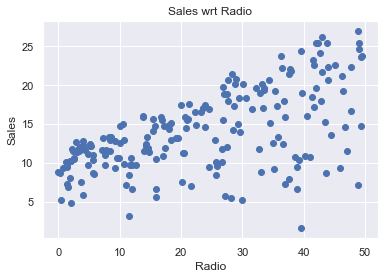

In [4]:
plt.scatter(data['radio'], data['sales'])
plt.title('Sales wrt Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')

We can clearly see that there is some kind of linear patern between these two varaibles. We want to implement the following equation: predicted_sales = Radio * weight + Bias

In [68]:
def predict_sales(radio, weight, bias):
    return(weight*radio + bias)

## Cost function
Here we will use the MSE (L2) function as cost function. This function will return a score that represents the fit of our previous equation to the data. The lowest the cost function, the better our model will be.
\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (mx_i + b))^2
\end{equation}

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - (y_{pred}))^2
\end{equation}

In [93]:
def cost_function(sales, radio, weight, bias):
    N = len(radio)
    total_error = 0.0
    
    predicted_sales = predict_sales(radio, weight, bias)
    
    for i in range(N):
        total_error += (sales[i] - predicted_sales[i])**2
    return(total_error / N)

Now we built our cost_function, we need to find a way to minimize it. To do this, we will use the gradient descent.

**Math** Here there are 2 parameters we want to estimate: the weight "m" and bias "b". To use the gradient descent on both of those, we need to calculate the partial derivatives of the cost_function for each varaible (we calculate the gradient of the cost function). Here is it:
\begin{equation}
 grad(f) = \binom{\frac{\partial f}{\partial m}}{\frac{\partial f}{\partial b}} = \binom{\frac{1}{N} \sum_{i=1}^n -2x_i(y_i - (mx_i + b))}{\frac{1}{N} \sum_{i=1}^n -2(y_i - (mx_i + b))}
 \end{equation}

In [94]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    N = len(radio)
    
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))
        
        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))
    
    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / N) * learning_rate
    bias -= (bias_deriv / N ) * learning_rate
    
    return(weight, bias)

In this code we can see a new parameter: "In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function" (Wikipédia)

The gradient has to be calculated for the weights and bias for all of the samples in the dataset. The partial derivatives indicates de slope of the curve of the cost_function for the given variable at the current position. To reduce the cost_function, we move in the opposite directection of the gradient. Since the gradient always indicates the way from low values to high values (physical definition) we need to move in the opposite direction indicated by the gradient to minimize the cost_fucntion.

## Training
In this section we will improve our model (deacrese the cost function) each time we go through the whole data by updating, at the same time, the weights and bias. The training is complete when we reach the wanted error threshold or when the coest_function connot be reduced anymore.

Before strating to train our model, we need to initialize our weights and bias (those are the default values). These are new hyperparameters, such as the learning rate.

In [121]:
def train(radio, sales, weight, bias, learning_rate, iters):
    # "iters" will be the number of iteration
    cost_history = [] # We will track each values of the cost_function to see it's evolution
    weight_history, bias_history = [],[]
    
    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)
        
        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        weight_history.append(weight)
        bias_history.append(bias)         
            
    return weight, bias, cost_history, weight_history, bias_history, iters

In [122]:
weight, bias, cost_history, weight_history, bias_history, iters = train(data['radio'], data['sales'], 0.1, 0, 0.0001, 40)
print(weight, bias)

0.48589511754358283 0.03323958807636157


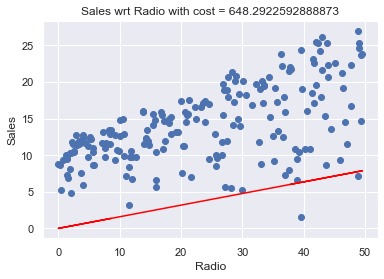

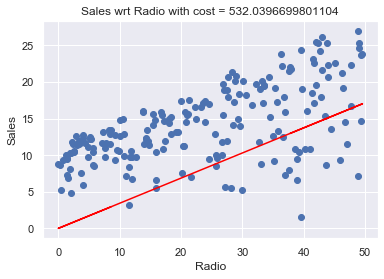

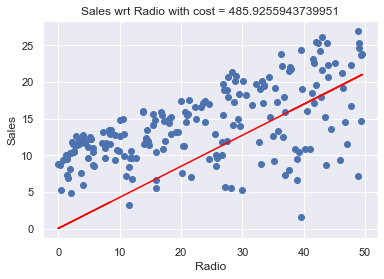

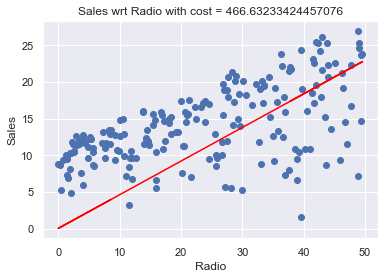

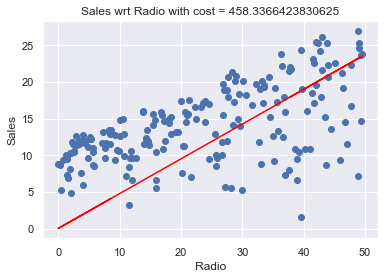

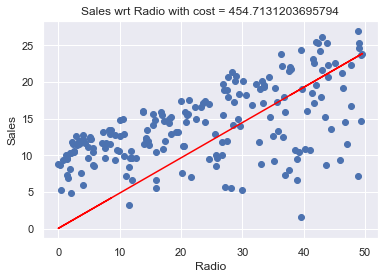

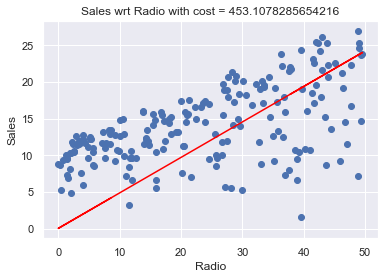

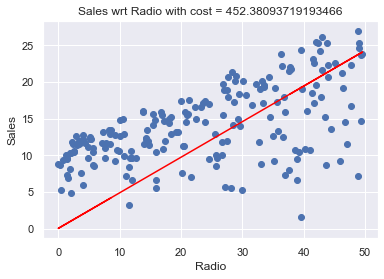

In [123]:
for i in range(0,len(weight_history),5):
    plt.figure()
    plt.scatter(data['radio'], data['sales'])
    plt.plot(data['radio'], data['radio']*weight_history[i] + bias_history[i], color = 'red')
    plt.title('Sales wrt Radio with cost = ' + str(cost_record[i]))
    plt.xlabel('Radio')
    plt.ylabel('Sales')

Text(0, 0.5, 'Value of the cost function')

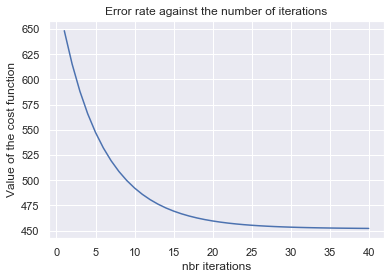

In [124]:
plt.figure()
plt.plot(np.arange(1,iters+1), cost_history)
plt.title('Error rate against the number of iterations')
plt.xlabel('nbr iterations')
plt.ylabel('Value of the cost function')

We can see with this final graph that the cost function strinclty decreases until a certain point. This means that it won't be necessary to do more iteration, the model won't be any better.

Here is the final graph with the final equation:
$ Sales = 0.48*Radio + 0.03 $

Text(0.5, 1.0, 'Linear Regression of Sales given radio')

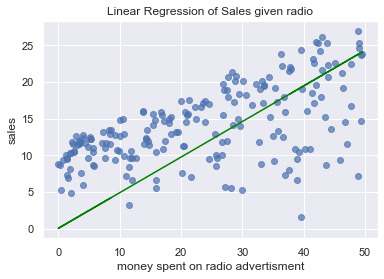

In [125]:
plt.figure()
plt.scatter(data['radio'], data['sales'], alpha = 0.7)
plt.plot(data['radio'], data['radio']*weight + bias, color = 'green')
plt.xlabel('money spent on radio advertisment')
plt.ylabel('sales')
plt.title('Linear Regression of Sales given radio')